## Energy, AI And Blockchain
- This is a ReadMe File and should explain the code 
- For this Data Science / Machine Learning Project it is important to install the necessary libraries, in the WU jupyter virtual environment these could be installed via the terminal with the pip installer: pip install (library name e.g pandas)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Read the CSV file
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory = False)

# Print the DataFrame
df


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


## Data Preprocessing

- it is necessary to clean and prepare the data for ML Algorithms

In [2]:
num_missing = df.isna().sum()

print(num_missing) 

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [3]:
# We have 25979 missing Values in Sub_metering_3 column

In [4]:
df.dtypes # analaysing the datatypes for further preprocessing

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [5]:
# Replace '?' with NaN
df['Sub_metering_1'] = df['Sub_metering_1'].replace('?', np.nan)
df['Sub_metering_2'] = df['Sub_metering_2'].replace('?', np.nan)
df['Global_active_power'] = df['Global_active_power'].replace('?', np.nan)
df['Global_reactive_power'] = df['Global_reactive_power'].replace('?', np.nan)
df['Voltage'] = df['Voltage'].replace('?', np.nan)
df['Global_intensity'] = df['Global_intensity'].replace('?', np.nan)



# Then convert the column to 'float64'
df['Sub_metering_1'] = df['Sub_metering_1'].astype('float64')
df['Sub_metering_2'] = df['Sub_metering_2'].astype('float64')
df['Global_active_power'] = df['Global_active_power'].astype('float64')
df['Global_reactive_power'] = df['Global_reactive_power'].astype('float64')
df['Voltage'] = df['Voltage'].astype('float64')
df['Global_intensity'] = df['Global_intensity'].astype('float64')



df.dtypes # now we changed the datatypes



Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [6]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Time' column to timedelta
df['Time'] = pd.to_timedelta(df['Time'])

# Create a new column by combining 'Date' and 'Time'
df['DateTime'] = df['Date'] + df['Time']

# Convert the new column to datetime64 data type
df['DateTime'] = pd.to_datetime(df['DateTime'], dayfirst = True)

# Print the updated DataFrame
df


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,2006-12-16,0 days 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,2006-12-16,0 days 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,2006-12-16,0 days 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,2006-12-16,0 days 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,2006-12-16,0 days 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,0 days 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,2010-11-26,0 days 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,2010-11-26,0 days 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,2010-11-26,0 days 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


## Exploratory data analysis (EDA)

In [7]:
# adding the 3 Values to get the total usage
df['Total_Usage'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'] 
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Total_Usage
0,2006-12-16,0 days 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,18.0
1,2006-12-16,0 days 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,17.0
2,2006-12-16,0 days 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,19.0
3,2006-12-16,0 days 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,18.0
4,2006-12-16,0 days 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,18.0
...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,0 days 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,0.0
2075255,2010-11-26,0 days 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,0.0
2075256,2010-11-26,0 days 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,0.0
2075257,2010-11-26,0 days 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,0.0


In [8]:
df.dropna(inplace=True)

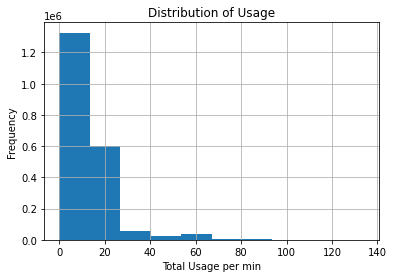

In [9]:
# create a histogram of the usage column
df['Total_Usage'].hist()

# set the title and labels of the plot
plt.title('Distribution of Usage')
plt.xlabel('Total Usage per min')
plt.ylabel('Frequency')

# display the plot
plt.show()


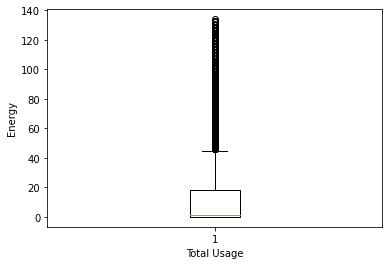

In [10]:
plt.boxplot(df['Total_Usage'])

# Add labels to the plot
plt.xlabel('Total Usage')
plt.ylabel('Energy')

# Show the plot
plt.show()


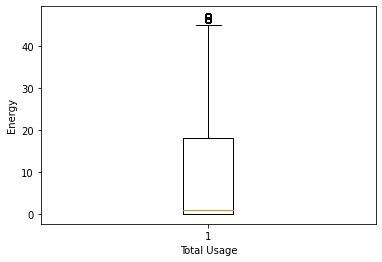

In [11]:
# Calculate the Z-score for each value in the 'total_usage' column
z_scores = (df['Total_Usage'] - df['Total_Usage'].mean()) / df['Total_Usage'].std()

# Set a threshold value for the Z-score (e.g., 3, which is commonly used)
threshold = 3

# Filter out the outliers by selecting only the rows with Z-scores below the threshold
df_no_outliers = df[abs(z_scores) < threshold]

# Create a boxplot of the 'total_usage' column
plt.boxplot(df_no_outliers['Total_Usage'])

# Add labels to the plot
plt.xlabel('Total Usage')
plt.ylabel('Energy')

# Show the plot
plt.show()


In [12]:
s_df = df[(df['Date'] >= '2007-01-01') & (df['Date'] <= '2009-12-31')]
s_df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Total_Usage
21996,2007-01-01,0 days 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00,0.0
21997,2007-01-01,0 days 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00,0.0
21998,2007-01-01,0 days 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00,0.0
21999,2007-01-01,0 days 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00,0.0
22000,2007-01-01,0 days 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1600231,2009-12-31,0 days 23:55:00,1.746,0.158,239.95,7.2,0.0,0.0,18.0,2009-12-31 23:55:00,18.0
1600232,2009-12-31,0 days 23:56:00,1.786,0.234,240.09,7.4,0.0,0.0,19.0,2009-12-31 23:56:00,19.0
1600233,2009-12-31,0 days 23:57:00,1.784,0.232,239.99,7.4,0.0,0.0,18.0,2009-12-31 23:57:00,18.0
1600234,2009-12-31,0 days 23:58:00,1.792,0.236,240.62,7.4,0.0,0.0,18.0,2009-12-31 23:58:00,18.0


In [13]:
s_df = s_df.set_index('DateTime')
s_df.index = pd.to_datetime(s_df.index)
s_df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Usage
DateTime,,,,,,,,,,
2007-01-01 00:00:00,2007-01-01,0 days 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,0.0
2007-01-01 00:01:00,2007-01-01,0 days 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,0.0
2007-01-01 00:02:00,2007-01-01,0 days 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,0.0
2007-01-01 00:03:00,2007-01-01,0 days 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,0.0
2007-01-01 00:04:00,2007-01-01,0 days 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2009-12-31 23:55:00,2009-12-31,0 days 23:55:00,1.746,0.158,239.95,7.2,0.0,0.0,18.0,18.0
2009-12-31 23:56:00,2009-12-31,0 days 23:56:00,1.786,0.234,240.09,7.4,0.0,0.0,19.0,19.0
2009-12-31 23:57:00,2009-12-31,0 days 23:57:00,1.784,0.232,239.99,7.4,0.0,0.0,18.0,18.0


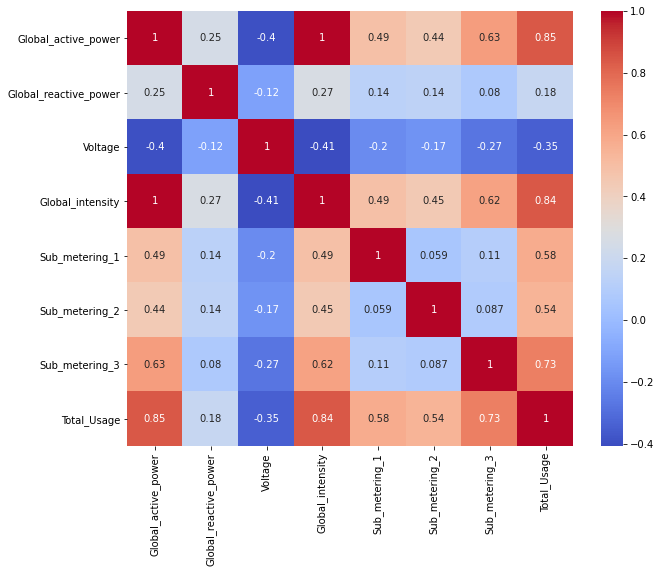

In [14]:
# Assuming df is your DataFrame
correlation = s_df.corr()

# Creating a figure and a subplot
plt.figure(figsize=(10, 8))

# Using Seaborn to create the heatmap for the correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm')

plt.show()


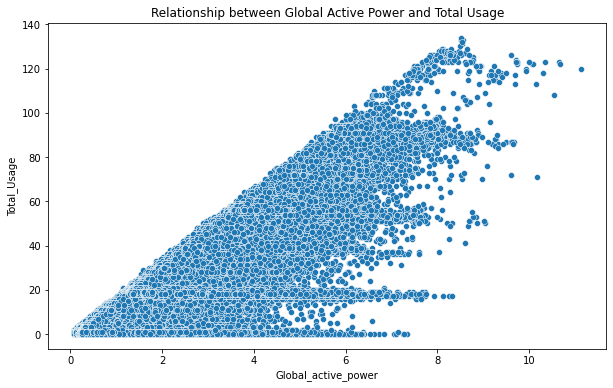

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Global_active_power', y='Total_Usage', data=s_df)
plt.title('Relationship between Global Active Power and Total Usage')
plt.show()


## ML Approach
- EMS predicting sub metering 1-3 classification (by predicting the specific sub metering by usage) --> actual data as input
- predicting USAGE for upcoming years (Forecast) (Regression)
- predicting USAGE for timestamps (Classification) morning noon etc.

### ML Models Algorithms
- first impression:
It looks like there is a potential valuable correlation between the submeterings and global active power 




### Random Forrest Classification:

In [16]:
# Define your features X and target variable y
X = s_df[['Global_active_power', 'Global_intensity','Total_Usage']]
y = s_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Train a Random Forest classifier on your training data
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate the accuracy of your model
# Note: in multi-output setting, we calculate accuracy for each output separately
accuracy_1 = accuracy_score(y_test['Sub_metering_1'], y_pred[:, 0])
accuracy_2 = accuracy_score(y_test['Sub_metering_2'], y_pred[:, 1])
accuracy_3 = accuracy_score(y_test['Sub_metering_3'], y_pred[:, 2])

print(f'Accuracy for Sub_metering_1 (kitchen): {accuracy_1}')
print(f'Accuracy for Sub_metering_2 (laundry room): {accuracy_2}')
print(f'Accuracy for Sub_metering_3 (electric water and air-conditioner): {accuracy_3}')


Accuracy for Sub_metering_1 (kitchen): 0.9135868526657749
Accuracy for Sub_metering_2 (laundry room): 0.7929507187294308
Accuracy for Sub_metering_3 (electric water and air-conditioner): 0.8042423084272884


### As we see our modell performs prettey well in terms of acurracy we could predict where in the Apartment the Energy is needed (based on the variables (Global_active_power = average world household energy usage :
- Sub_metering_1 --> kitchen
- Sub_metering_2 --> laundry room
- Sub_metering_3 --> electric water heater and air-conditioner